# **LOADING THE DATA AND EXPLORATION**

In [2]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [3]:
data = pd.read_csv("hate_speech.csv")

In [4]:
data.head()

,Unnamed: 0,text,label
0,0,"As of March 13th , 2014 , the booklet had been...",0
1,1,In order to help increase the booklets downloa...,0
2,2,( Simply copy and paste the following text int...,0
3,3,Click below for a FREE download of a colorfull...,1
4,4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0


In [5]:
# REVIEW THE DATA

#data.tail(20)
data.iloc[10301]["text"]

'White money should only be for the benefit of the white race .'

In [6]:
data["label"].value_counts()

label
1    21816
0    13670
Name: count, dtype: int64

In [7]:
# RENAMING COLUMNS
data = data.rename(columns = {"text":"Text", "label" :"Category" })

In [8]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

data = data[["Text", "Category"]]

In [9]:
# REVIEW DATA AFTER CHANGES

data.head(5)

,Text,Category
0,"As of March 13th , 2014 , the booklet had been...",0
1,In order to help increase the booklets downloa...,0
2,( Simply copy and paste the following text int...,0
3,Click below for a FREE download of a colorfull...,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0


In [10]:
# CHECK THE SHAPE OF THE DATA

data.shape

(35486, 2)

In [11]:
# CHECK INFO REGARDING IT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35486 entries, 0 to 35485
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      35486 non-null  object
 1   Category  35486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 554.6+ KB


In [12]:
# CHECK IF THERE ARE NULL VALUES

data.isnull().sum()

Text        0
Category    0
dtype: int64

In [13]:
# REMOVING DUPLICATE VALUES

data = data.drop_duplicates()

In [14]:
# CHECKING ALL CATEGORIES

data["Category"].unique()

array([0, 1])

In [15]:
# RENAMING COLUMNS TO MAKE UNDERSTANDING OF EXPLORATION RESULTS EASIER

data['Category'] = data['Category'].replace(0,'neutral')
data['Category'] = data['Category'].replace(1,'offensive')

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING OFFENSIVE OR NOT')

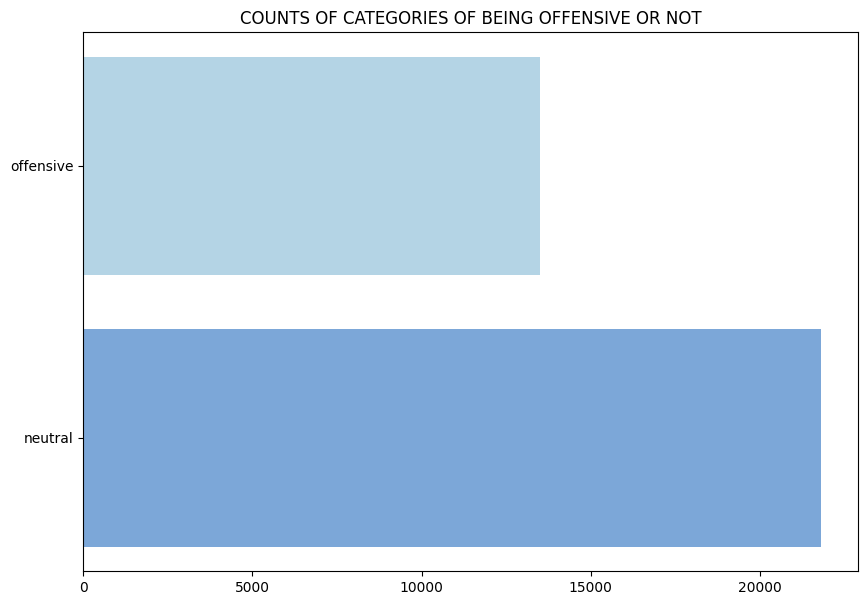

In [16]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(10, 7))
plt.barh(data["Category"].unique(), data["Category"].value_counts(),
         color =['#7CA7D8', '#B4D4E5'])
plt.title("COUNTS OF CATEGORIES OF BEING OFFENSIVE OR NOT")

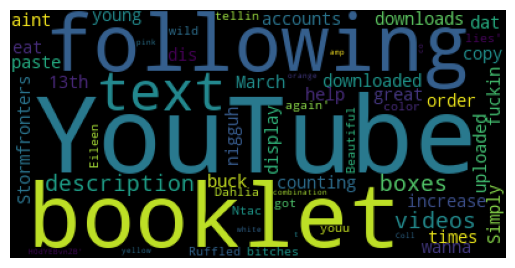

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [17]:
from wordcloud import WordCloud, STOPWORDS
text = data['Text'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [18]:
data['Category'] = data['Category'].replace('neutral', 0)
data['Category'] = data['Category'].replace('offensive', 1)

In [19]:
data.head()

,Text,Category
0,"As of March 13th , 2014 , the booklet had been...",0
1,In order to help increase the booklets downloa...,0
2,( Simply copy and paste the following text int...,0
3,Click below for a FREE download of a colorfull...,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0


# **TEXT PREPROCESSING**

In [21]:
import nltk
# YOU might need those Lines to run NLTK code
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [22]:
data = data.sample(frac=1)

In [23]:
data["Text"] = data["Text"].str.lower()

In [24]:
def preprocess(text):
    # Remove non-alphabet characters and convert to lowercase
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    text_cleaned = re.sub('[^a-zA-Z]', ' ', text)
    text_cleaned = text_cleaned.lower()
    
    # Tokenize the cleaned text
    words = word_tokenize(text_cleaned)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Lemmatize and stem each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
    
    # Join the stemmed words back into a single string
    processed_text = ' '.join(stemmed_words)
    
    return processed_text

In [25]:
data["Text"] = data["Text"].apply(preprocess)

In [27]:
# REVIEW THE DATA AFTER TEXT PREPROCESSING
data.head()

,Text,Category
17184,kieffer jason umm sure hoe talk ugli,1
8237,gun n rose music,0
22973,lmao joe call whitehous offer advic yeah presi...,0
3811,white agre point also other,0
8955,hope traitor encircl westminst palac,1


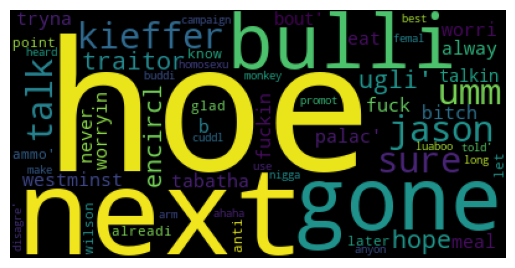

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [29]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING
TEXT_AFTER_PREPROCESS = data[data["Category"]==1]['Text'].values

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

# **TEXT VECTORIZATION**

In [30]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [31]:
# Split data into features (X) and target labels (y)
X = data['Text']
y = data['Category']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# FITTING VECTORIZER TO OUR DATA

vectorizer = TfidfVectorizer()
Text_tf = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)

# **FITTING OUR MACHINE LEARNING MODELS**

In [33]:
# IMPORTING TIME LIBRARY TO PRINT THE TIME TAKEN TO TRAIN AND PREDICT WITH THE MODEL

from time import time

***1) FITTING A MULTIPLE LOGISTIC REGRESSION MODEL***

In [34]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [35]:
# FITTING THE MODEL

lr_t0 = time()

lgr = LogisticRegression()
lgr.fit(Text_tf, y_train)

print("Training Time of the Logistic Regression Model:", round(time()-lr_t0, 3), "seconds",'\n')

Training Time of the Logistic Regression Model: 0.211 seconds 



In [36]:
# PREDICTING WITH THE MODEL

lr_t1 = time()

y_pred_lgr = lgr.predict(x_test_vect)

print("Time taken to make predictions for the Logistic Regression Model:", round(time()-lr_t1, 3), "seconds",'\n')

Time taken to make predictions for the Logistic Regression Model: 0.003 seconds 



***2) FITTING A DECISION TREE CLASSIFIER***

In [37]:
# IMPORTING LIBRARY TO IMPLEMENT DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

In [38]:
# FITTING THE MODEL

dt_t0=time()

dt = nb = DecisionTreeClassifier()
dt.fit(Text_tf, y_train)

print("Training Time of the Decission Tree Classifier:", round(time()-dt_t0, 3), "seconds", '\n')

Training Time of the Decission Tree Classifier: 6.761 seconds 



In [39]:
# PRINTING NO. OF NODES OF OUR DECISION TREE MODEL

dt_nodes = dt.tree_.node_count
print("No. of nodes of our Decision Tree Model is:", dt_nodes)
print('\n')

No. of nodes of our Decision Tree Model is: 2723




In [40]:
# PREDICTING WITH THE MODEL

dt_t1=time()

y_pred_dt = dt.predict(x_test_vect)

print("Time taken to make predictions for the Decission Tree Classifier :", round(time()-dt_t1, 3), "seconds",'\n')

Time taken to make predictions for the Decission Tree Classifier : 0.011 seconds 



***3) FITTING A RANDOM FORESTS CLASSIFIER***

In [41]:
# IMPORTING LIBRARY TO IMPLEMENT RANDOM FORESTS CLASSIFIER

from sklearn.svm import LinearSVC


In [42]:
# FITTING THE MODEL

svc_t0=time()

svc = LinearSVC()
svc.fit(Text_tf, y_train)

print("Training Time of the Support Vector Classifier:", round(time()-svc_t0, 3), "seconds", '\n')

Training Time of the Support Vector Classifier: 0.108 seconds 



/Users/faressaad/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [58]:
#PREDICTING WITH THE MODEL

svc_t1 = time()

y_pred_svc = svc.predict(x_test_vect)

print("Time taken to make predictions for the Support Vector Classifier:", round(time()-svc_t1, 3), "seconds", '\n')

Time taken to make predictions for the Support Vector Classifier: 0.013 seconds 



# **EVALUATING OUR MODELS**

In [59]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [60]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression model is: ", accuracy_score(y_pred_lgr, y_test), "\n")
print("Accuracy Score of our Naive Bayes Classifier is: ", accuracy_score(y_pred_dt, y_test), "\n")
print("Accuracy Score of our Support Vector Classifier is: ", accuracy_score(y_pred_svc, y_test), "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression model is:  0.9353057757644394 

Accuracy Score of our Naive Bayes Classifier is:  0.9218573046432617 

Accuracy Score of our Support Vector Classifier is:  0.934881087202718 



<Figure size 2000x2000 with 0 Axes>

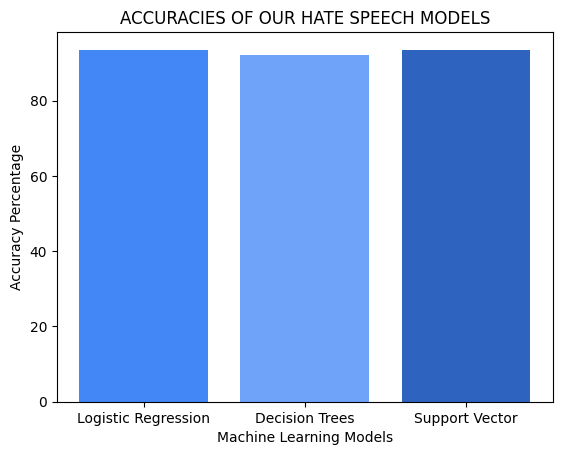

<Figure size 2000x2000 with 0 Axes>

In [61]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["Logistic Regression","Decision Trees", "Support Vector"], height = [(accuracy_score(y_pred_lgr, y_test))*100, (accuracy_score(y_pred_dt, y_test))*100,(accuracy_score(y_pred_svc, y_test))*100 ], color = ['#4287f5', '#6fa2f9', '#2e64c0'])
plt.title("ACCURACIES OF OUR HATE SPEECH MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Machine Learning Models")

plt.figure(figsize=(20,20))


In [62]:
# CONFUSION MATRIX FOR OUR LOGISTIC REGRESSION MODEL

confusion_lgr = confusion_matrix(y_pred_lgr, y_test)

print("Confusion Matrix of our Logistic Regression Model is:")
print(confusion_lgr, "\n")
print("The no. of true positives are:", confusion_lgr[0,0], "\n")
print("The no. of true negatives are:", confusion_lgr[1,1], "\n")

Confusion Matrix of our Logistic Regression Model is:
[[2591  332]
 [ 125 4016]] 

The no. of true positives are: 2591 

The no. of true negatives are: 4016 



In [63]:
# CONFUSION MATRIX FOR OUR DECISION TREES CLASSIFIER MODEL

confusion_dt = confusion_matrix(y_pred_dt, y_test)

print("Confusion Matrix of our DECISION TREES CLASSIFIER is:")
print(confusion_dt, "\n")
print("The no. of true positives are:", confusion_dt[0,0], "\n")
print("The no. of true negatives are:", confusion_dt[1,1], "\n")

Confusion Matrix of our DECISION TREES CLASSIFIER is:
[[2443  279]
 [ 273 4069]] 

The no. of true positives are: 2443 

The no. of true negatives are: 4069 



In [64]:
# CONFUSION MATRIX FOR OUR Support Vector Classifier MODEL

confusion_rf = confusion_matrix(y_pred_svc, y_test)

print("Confusion Matrix of our Support Vector Classifier is:")
print(confusion_svc, "\n")
print("The no. of true positives are:", confusion_svc[0,0], "\n")
print("The no. of true negatives are:", confusion_svc[1,1], "\n")

Confusion Matrix of our Support Vector Classifier is:
[[2551  295]
 [ 165 4053]] 

The no. of true positives are: 2551 

The no. of true negatives are: 4053 



In [66]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lgr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Support Vector Classifier is: ", f1_score(y_pred_svc, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9461656261043704 

F1 Score of our Decision Tree Classifier is:  0.9364787111622555 

F1 Score of our Support Vector Classifier is:  0.9462993229045061 



In [69]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lgr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Support Vector Classifier is: ", recall_score(y_pred_svc, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  0.9698140545761893 

Recall Score of our Decision Tree Classifier is:  0.937125748502994 

Recall Score of our Support Vector Classifier is:  0.9608819345661451 



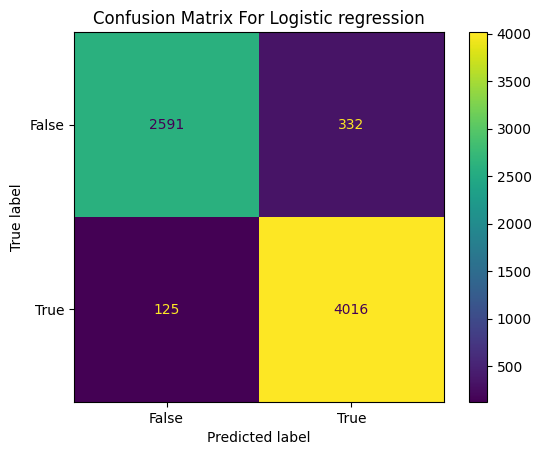

In [70]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_lgr, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix For Logistic regression")
plt.show()

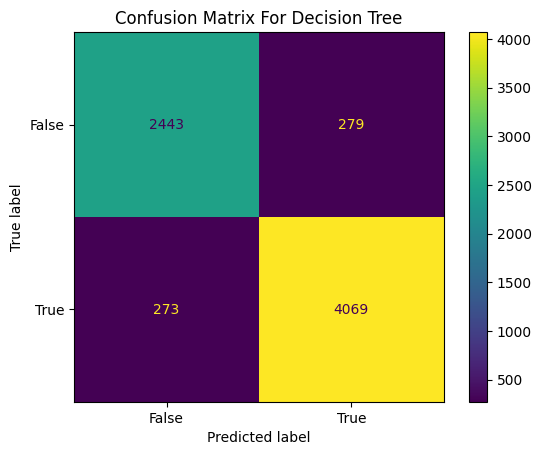

In [71]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_dt, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix For Decision Tree")
plt.show()

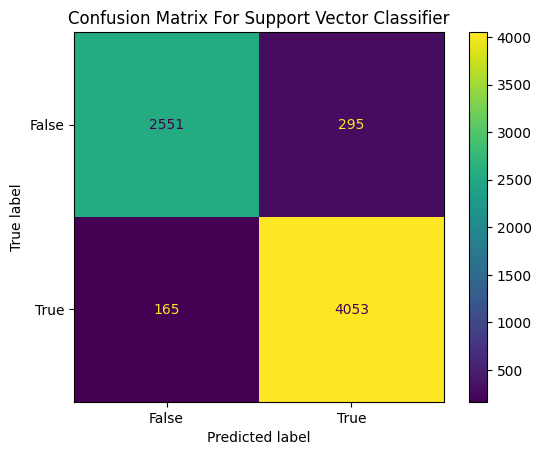

In [72]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_svc, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix For Support Vector Classifier")
plt.show()